<a href="https://colab.research.google.com/github/etappau/info5731/blob/master/smallStoresRetail_locationAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings("ignore")


In [0]:
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [60]:
from google.colab import files
uploaded = files.upload()

Saving Book2.csv to Book2.csv


reading the data

In [0]:
df = pd.read_csv('Book2.csv', encoding = 'utf8', index_col = 'SID')

checking for null values

In [0]:
df.isnull().sum()

In [0]:
list(df)

In [0]:
df['SQFT'] = df['SQFT'].str.replace(",","")

In [0]:
df.SQFT.dtype

dtype('float64')

In [0]:
df['SALES_2018'] = df['SALES_2018'].str.replace(",","")
df['SALES_2018'] = df['SALES_2018'].str.replace("$","")

In [0]:
df.SALES_2018.dtype

dtype('float64')

In [62]:
df.shape

(21, 442)

In [63]:
#stats of the predictor variable (saleprice)
df.SALES_2018.describe().round(2)

count         21.00
mean     2412955.17
std       291463.18
min      2161264.65
25%      2242084.74
50%      2342536.47
75%      2417817.13
max      3230843.40
Name: SALES_2018, dtype: float64

In [0]:
#overview ofthe data
df.head()

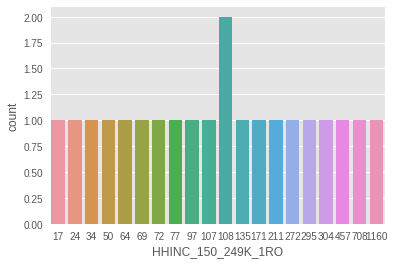

In [78]:
sns.countplot(x='HHINC_150_249K_1RO', data=df)

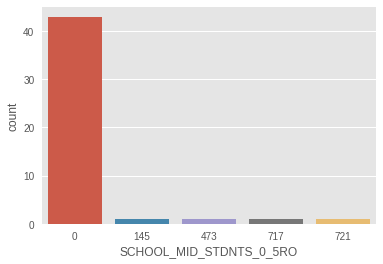

In [0]:
sns.countplot(x='SCHOOL_MID_STDNTS_0_5RO', data=df)

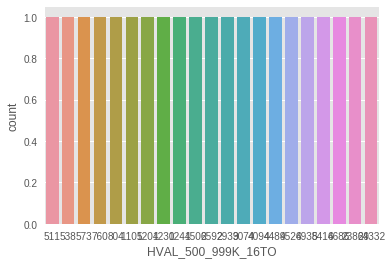

In [79]:
sns.countplot(x='HVAL_500_999K_16TO', data=df)

In [64]:
df.describe()

,SQFT,SALES_2018,AGE_ADULT18P_8TO,AGE_ADULT18P_16TO,AGE_BABYBOOM5069_8TO,AGE_BABYBOOM5069_16TO,AGE_COLLG1821_8TO,AGE_COLLG1821_16TO,AGE_DRINKADULT21P_8TO,AGE_DRINKADULT21P_16TO,...,XRACE_WHTHH_1RO,XRACE_WHTHH_8TO,XRACE_WHTHH_16TO,XRACE_WHTPOP_1RO,XRACE_WHTPOP_8TO,XRACE_WHTPOP_16TO,CUSTOMER_VALUE,CUSTOMER_VALUE_QUAL,CUSTOMER_VALUE_W,CUSTOMER_VALUE_W_QUAL
count,21.000000,2.100000e+01,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,...,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,2.100000e+01,21.000000,2.100000e+01,21.000000
mean,14031.916667,2.412955e+06,35443.761905,151408.190476,9726.761905,43595.857143,2855.428571,10921.190476,33352.142857,143389.714286,...,67.833333,66.730476,66.280952,63.190952,62.329524,62.303810,7.167002e+06,545.913012,9.564564e+06,471.419531
std,2490.188059,2.914632e+05,12162.354891,76226.346038,2892.187648,20224.208986,3360.052523,6939.425031,11114.145119,72204.637951,...,18.206325,16.818819,15.977291,17.799852,16.525352,16.058242,2.261698e+06,96.506164,5.044866e+06,28.920385
min,10580.000000,2.161265e+06,17994.000000,47606.000000,4743.000000,13429.000000,1122.000000,3168.000000,17142.000000,43622.000000,...,26.820000,34.610000,28.030000,25.330000,32.900000,27.650000,3.256532e+06,313.203408,3.586328e+06,420.552220
25%,12165.850000,2.242085e+06,25763.000000,110707.000000,8294.000000,34288.000000,1498.000000,7384.000000,24767.000000,105013.000000,...,55.240000,51.310000,55.570000,50.440000,48.220000,49.900000,6.290933e+06,515.614668,6.119430e+06,459.144913
50%,13759.750000,2.342536e+06,33206.000000,138532.000000,9617.000000,39783.000000,2057.000000,8180.000000,32066.000000,130657.000000,...,71.670000,69.270000,68.320000,66.500000,64.370000,65.410000,6.924028e+06,588.152558,7.617662e+06,471.600953
75%,15189.200000,2.417817e+06,42753.000000,196173.000000,11035.000000,50319.000000,2817.000000,12804.000000,40969.000000,180072.000000,...,81.710000,80.280000,77.590000,77.970000,75.840000,72.120000,8.282649e+06,610.716693,1.108121e+07,487.461212
max,21122.050000,3.230843e+06,58897.000000,314026.000000,18345.000000,82119.000000,17171.000000,31127.000000,56462.000000,298832.000000,...,91.110000,90.450000,93.180000,87.850000,87.230000,90.960000,1.152821e+07,661.642958,1.978817e+07,531.241676


In [76]:
#features with the most correlation with the predicted variable
corr = df.corr()
print("features with the most correlation with SALES_2018")
print(corr['SALES_2018'].sort_values(ascending = False)[:50], '\n')
print(corr['SALES_2018'].sort_values(ascending = False)[-15:])

features with the most correlation with SALES_2018
SALES_2018              1.000000
HVAL_500_999K_16TO      0.891931
XHVAL_500_999K_16TO     0.858400
HHINC_150_249K_1RO      0.849197
HHINC_250KPL_1RO        0.830344
HHINC_100KPL_1RO        0.829291
HHINC_150_249K_16TO     0.807186
HHINC_250KPL_16TO       0.800640
HHINC_100_149K_1RO      0.791464
XHHINC_250KPL_16TO      0.782187
EDUC_MSTR_1RO           0.775917
HHINC_100KPL_16TO       0.774411
HVAL_500_999K_8TO       0.768558
XHVAL_500_999K_8TO      0.765313
CX01V143_0_5RO          0.761651
XHHINC_150_249K_8TO     0.752575
HVAL_MED_16TO           0.751177
EDUC_MSTR_16TO          0.749149
CX01V142_0_5RO          0.746792
HHINC_AVG_8TO           0.746569
EDUC_BACHPL_1RO         0.743388
XHHINC_250KPL_8TO       0.740792
EDUC_PRO_16TO           0.738864
XHVAL_500_999K_1RO      0.734527
CX01V143_1RO            0.732823
HVAL_1MPL_16TO          0.731547
HHINC_150_249K_8TO      0.729432
HHINC_AVG_16TO          0.728851
XHHINC_150_249K_16TO    0

In [0]:
corr_with_sales = df.corr()["SALES_2018"].sort_values(ascending=False)
plt.figure(figsize=(20,12))
corr_with_sales.drop("SALES_2018").plot.bar()
plt.show();

In [0]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

def select_kbest_reg(data_frame, target, k=5):
    """
    Selecting K-Best features regression
    :param data_frame: A pandas dataFrame with the training data
    :param target: target variable name in DataFrame
    :param k: desired number of features from the data
    :returns feature_scores: scores for each feature in the data as 
    pandas DataFrame
    """
    feat_selector = SelectKBest(f_regression, k=k)
    _ = feat_selector.fit(data_frame.drop(target, axis=1), data_frame[target])
    
    feat_scores = pd.DataFrame()
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["P Value"] = feat_selector.pvalues_
    feat_scores["Support"] = feat_selector.get_support()
    feat_scores["Attribute"] = data_frame.drop(target, axis=1).columns
    
    return feat_scores

In [69]:
per_feat = select_kbest_reg(df, 'SALES_2018', k=10)
per_feat = per_feat.sort_values(["F Score", "P Value"], ascending=[False, False])
print("\n Feature Score using regression\n")
print(per_feat)


 Feature Score using regression

       F Score       P Value  Support                Attribute
185  73.928319  5.650623e-08     True       HVAL_500_999K_16TO
391  53.202187  6.426441e-07     True      XHVAL_500_999K_16TO
137  49.133350  1.125628e-06     True       HHINC_150_249K_1RO
140  42.185944  3.189039e-06     True         HHINC_250KPL_1RO
131  41.843562  3.367387e-06     True         HHINC_100KPL_1RO
139  35.527180  9.766213e-06     True      HHINC_150_249K_16TO
142  33.928384  1.304897e-05     True        HHINC_250KPL_16TO
134  31.858579  1.925269e-05     True       HHINC_100_149K_1RO
364  29.945941  2.799393e-05     True       XHHINC_250KPL_16TO
107  28.744321  3.569662e-05     True            EDUC_MSTR_1RO
133  28.465822  3.779984e-05    False        HHINC_100KPL_16TO
184  27.418542  4.702970e-05    False        HVAL_500_999K_8TO
390  26.860896  5.294371e-05    False       XHVAL_500_999K_8TO
85   26.250229  6.038191e-05    False           CX01V143_0_5RO
361  24.816002  8.284

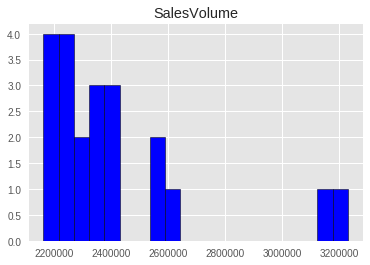

In [70]:
y = df['SALES_2018']
plt.title('SalesVolume')

#y.plot.hist(COLOR = "green", bins = 20, ec = "black")
plt.hist(y,COLOR = "blue", bins = 20, ec = "black")
plt.show()

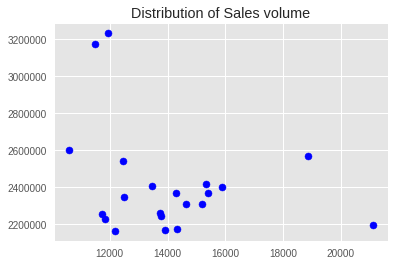

In [71]:
y = df['SALES_2018']
x = df['SQFT']
plt.title('Distribution of Sales volume')
plt.scatter(x, y, COLOR = "blue")
plt.show()

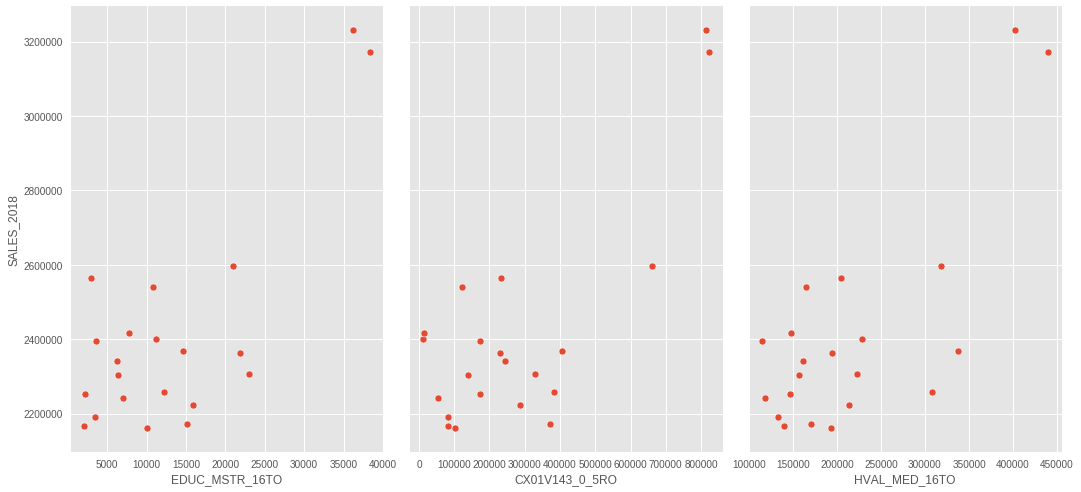

In [92]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['EDUC_MSTR_16TO', 'CX01V143_0_5RO', 'HVAL_MED_16TO'], y_vars='SALES_2018', size=7, aspect=0.7)

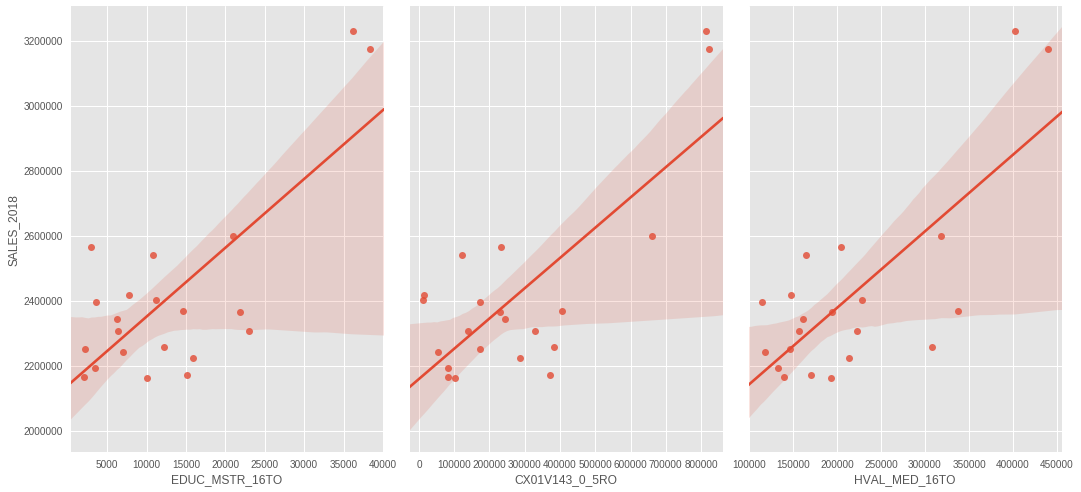

In [94]:
#Plotting the Least Squares Line
sns.pairplot(df, x_vars=['EDUC_MSTR_16TO', 'CX01V143_0_5RO', 'HVAL_MED_16TO'], y_vars='SALES_2018', size=7, aspect=0.7, kind='reg')

In [0]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df[['SALES_2018', 'EDUC_MSTR_16TO', 'CX01V143_0_5RO', 'HVAL_MED_16TO']])
plt.show();

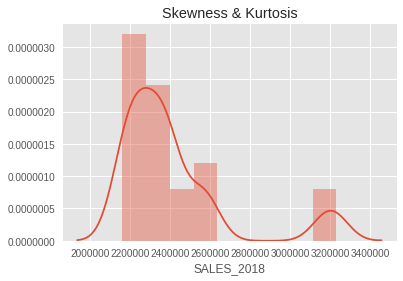

In [81]:
# skew and kurtosis
sns.distplot(df.SALES_2018)
plt.title("Skewness & Kurtosis")
plt.show();

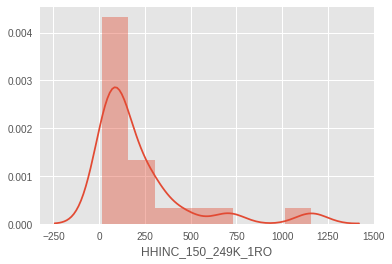

In [83]:
# skew and kurtosis
sns.distplot(df.HHINC_150_249K_1RO)
plt.show();

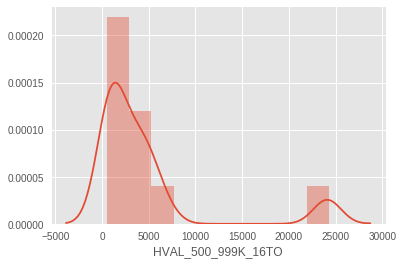

In [80]:
# skew and kurtosis
sns.distplot(df.HVAL_500_999K_16TO)
plt.show();

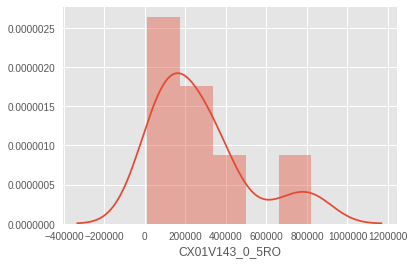

In [87]:
# skew and kurtosis
sns.distplot(df.CX01V143_0_5RO)
plt.show();

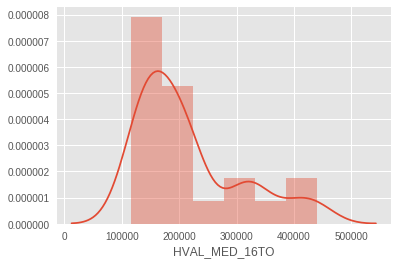

In [89]:
# skew and kurtosis
sns.distplot(df.HVAL_MED_16TO)
plt.show();

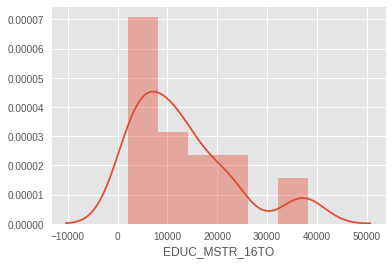

In [90]:
# skew and kurtosis
sns.distplot(df.EDUC_MSTR_16TO)
plt.show();

In [0]:
y = df.SALES_2018
X = df.loc[:, df.columns != 'SALES_2018']

In [0]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [96]:
#Predict with all variables
# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X, y)

# Predict
y_pred = lm2.predict(X)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y, y_pred)))

1.1752342205978603e-07


LR picked 439 features and eliminated the other 2 features


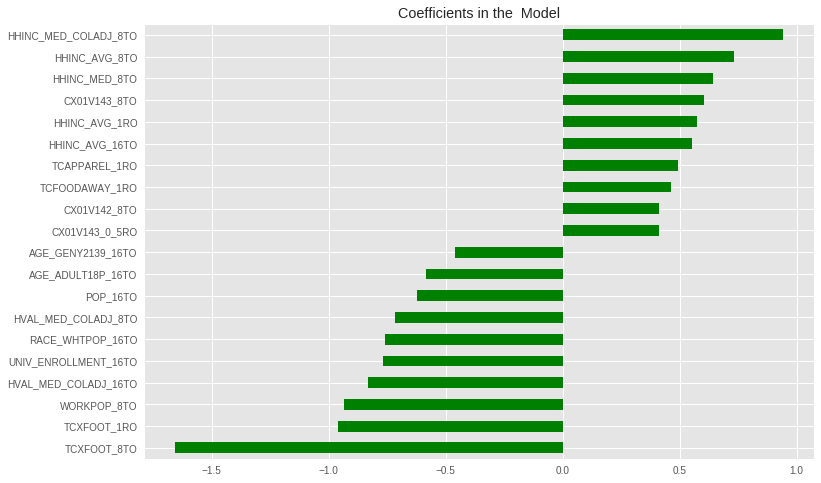

In [97]:
# Plot coefficients in order of importance
coefs = pd.Series(lm2.coef_, index = X.columns)
print("LR picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh",figsize =(12,8), color = "green")
plt.title("Coefficients in the  Model")
plt.show()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [99]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10, 441)
(11, 441)
(10,)
(11,)


In [122]:
#Prediction with split of training & test data
# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

181507.02698901872


LR picked 436 features and eliminated the other 5 features


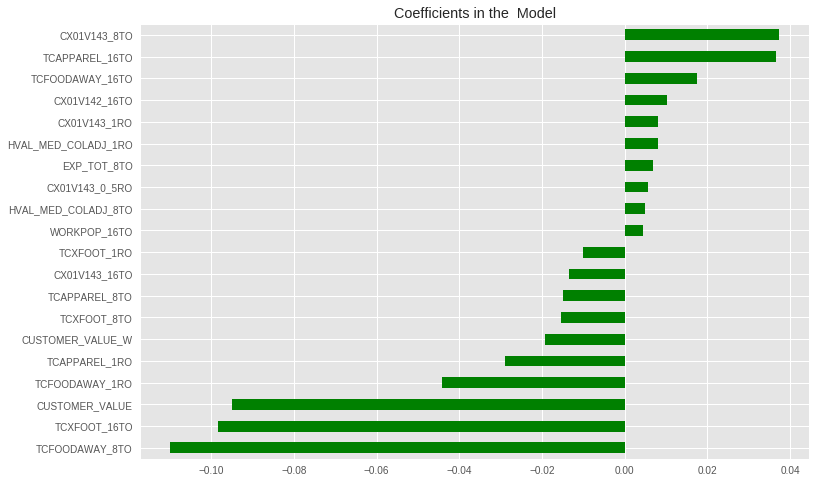

In [101]:
# Plot coefficients in order of importance
coefs = pd.Series(lm2.coef_, index = X_train.columns)
print("LR picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh",figsize =(12,8), color = "green")
plt.title("Coefficients in the  Model")
plt.show()

In [0]:
df.HVAL_MED_COLADJ_1RO

In [123]:
# Include only the selected 5
X = df[['EDUC_MSTR_16TO', 'CX01V143_0_5RO', 'HVAL_MED_16TO']]
y = df.SALES_2018

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
# Instantiate model
lm2 = LinearRegression()

# Fit model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

183757.78756793385


In [119]:
y_test_pred = lm2.predict(X_test)
y_train_pred = lm2.predict(X_train)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 32812005452.526, test: 33766924491.862
R^2 train: 0.625, test: 0.528


3 features, reduction of 0.00%


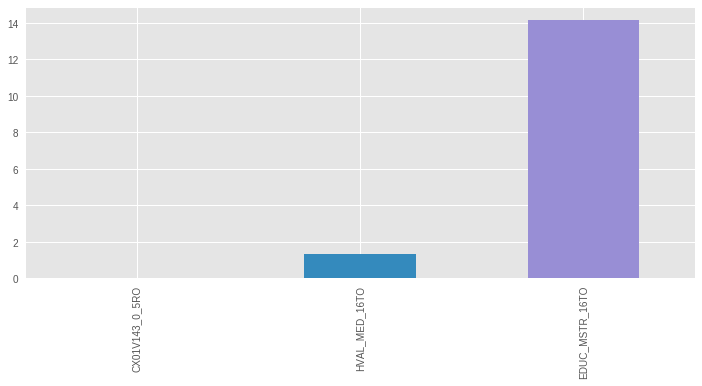

In [103]:
feature_importance = pd.Series(index = X_train.columns, data = np.abs(lm2.coef_))

n_selected_features = (feature_importance>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))

feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (12,5));

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [105]:
y_test_pred = lm2.predict(X_test)
y_train_pred = lm2.predict(X_train)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 32812005452.526, test: 33766924491.862
R^2 train: 0.625, test: 0.528


In [106]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['EDUC_MSTR_16TO', 'CX01V143_0_5RO', 'HVAL_MED_16TO']
X = df[feature_cols]
y = df.SALES_2018

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

2043346.0238741264
[8.3264252  0.37045839 0.74697528]


LR picked 3 features and eliminated the other 0 features


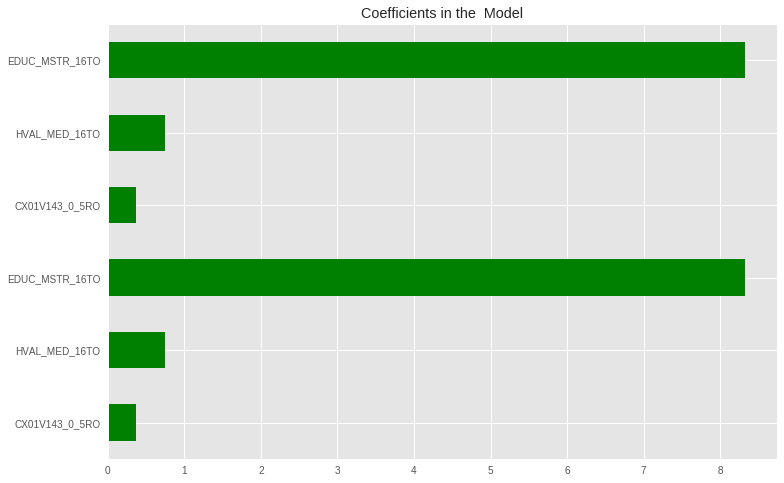

In [107]:
# Plot coefficients in order of importance
coefs = pd.Series(lm2.coef_, index = X.columns)
print("LR picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh",figsize =(12,8), color = "green")
plt.title("Coefficients in the  Model")
plt.show()

In [108]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm2.coef_))

[('EDUC_MSTR_16TO', 8.326425203976282),
 ('CX01V143_0_5RO', 0.3704583922176281),
 ('HVAL_MED_16TO', 0.7469752822201003)]

In [109]:
y_pred = lm2.predict(X)
r2_score(y, y_pred)

0.6303264554207548

In [110]:
# make predictions on the testing set
y_pred = lm2.predict(X_test)
y_pred

array([2455184.08428186, 2566881.72185948, 2995520.22759743,
       2307164.31475079, 2235440.64607542, 2195862.11754319,
       2223063.40557363, 2311294.73404821, 2700770.62917475,
       2308858.03093558, 2301569.37706372])

In [111]:
y_test

SID
21266591    2363774.790
21266575    2368296.047
21266546    3172533.475
21266604    2564704.717
21266599    2251624.319
21266583    2166316.436
21266594    2396199.811
21266554    2401799.465
21266535    2597998.542
21266558    2161264.646
21266563    2539591.212
Name: SALES_2018, dtype: float64

In [112]:
print("y_true=%s, Predicted=%s" % (y_test, y_pred))

y_true=SID
21266591    2363774.790
21266575    2368296.047
21266546    3172533.475
21266604    2564704.717
21266599    2251624.319
21266583    2166316.436
21266594    2396199.811
21266554    2401799.465
21266535    2597998.542
21266558    2161264.646
21266563    2539591.212
Name: SALES_2018, dtype: float64, Predicted=[2455184.08428186 2566881.72185948 2995520.22759743 2307164.31475079
 2235440.64607542 2195862.11754319 2223063.40557363 2311294.73404821
 2700770.62917475 2308858.03093558 2301569.37706372]


In [113]:
# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

138391.4924259698
24886832795.311283
157755.61097885325
